In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dataset
df = pd.read_csv("/Users/hoangvupham/Desktop/KLTN_VU/Data/amazon_delivery.csv")

# Xem 5 dòng đầu
df.head()


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [3]:
import pandas as pd

# Gán giá trị hàng hóa thực tế theo nhóm Category
goods_value_map = {
    'Grocery': 50_000,         # hàng tiêu dùng nhanh
    'Snacks': 70_000,
    'Books': 150_000,
    'Apparel': 200_000,
    'Clothing': 250_000,
    'Toys': 300_000,
    'Pet Supplies': 350_000,
    'Home': 400_000,
    'Kitchen': 450_000,
    'Sports': 500_000,
    'Outdoors': 600_000,
    'Skincare': 700_000,
    'Cosmetics': 800_000,
    'Jewelry': 1_500_000,
    'Electronics': 2_000_000   # đắt nhất
}

# Tạo cột Goods_Value, nếu Category không có trong map thì dùng median
df["Goods_Value"] = df["Category"].map(goods_value_map)
df["Goods_Value"].fillna(df["Goods_Value"].median(), inplace=True)

# Kiểm tra phân bố
print(df.groupby("Category")["Goods_Value"].median().sort_values())



Category
Grocery           50000.0
Snacks            70000.0
Books            150000.0
Apparel          200000.0
Clothing         250000.0
Toys             300000.0
Pet Supplies     350000.0
Home             400000.0
Shoes            400000.0
Kitchen          450000.0
Sports           500000.0
Outdoors         600000.0
Skincare         700000.0
Cosmetics        800000.0
Jewelry         1500000.0
Electronics     2000000.0
Name: Goods_Value, dtype: float64


/var/folders/q_/7yj89v297cv8_gq1jyq7x2sw0000gn/T/ipykernel_71205/2701276873.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Goods_Value"].fillna(df["Goods_Value"].median(), inplace=True)


In [4]:
# Kích thước dữ liệu
print("Shape:", df.shape)

# Thông tin các cột
print(df.info())

# Thống kê mô tả
df.describe(include="all").T

# Missing values
df.isnull().sum()


Shape: (43739, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
 16  Goods_Value      43739 non-null  float6

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
Goods_Value         0
dtype: int64

In [5]:
# Điền median cho Agent_Rating
df['Agent_Rating'].fillna(df['Agent_Rating'].median(), inplace=True)

# Điền mode cho Weather
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

df.isnull().sum()


/var/folders/q_/7yj89v297cv8_gq1jyq7x2sw0000gn/T/ipykernel_71205/240968300.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Agent_Rating'].fillna(df['Agent_Rating'].median(), inplace=True)
/var/folders/q_/7yj89v297cv8_gq1jyq7x2sw0000gn/T/ipykernel_71205/240968300.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
Goods_Value        0
dtype: int64

In [6]:
# --- Bước xử lý datetime chuẩn ---
# Chuyển Order_Date thành datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Chuyển Order_Time & Pickup_Time thành kiểu time (chỉ giờ:phút:giây)
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format="%H:%M:%S", errors='coerce').dt.time
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format="%H:%M:%S", errors='coerce').dt.time

# Ghép Order_Date + Order_Time thành một cột datetime đầy đủ
df['Order_DateTime'] = df.apply(
    lambda row: pd.Timestamp.combine(row['Order_Date'], row['Order_Time'])
    if pd.notnull(row['Order_Date']) and pd.notnull(row['Order_Time']) else pd.NaT, axis=1
)

# Ghép Order_Date + Pickup_Time thành một cột datetime đầy đủ
df['Pickup_DateTime'] = df.apply(
    lambda row: pd.Timestamp.combine(row['Order_Date'], row['Pickup_Time'])
    if pd.notnull(row['Order_Date']) and pd.notnull(row['Pickup_Time']) else pd.NaT, axis=1
)

# Tính Pickup_delay (phút)
df['Pickup_delay'] = (df['Pickup_DateTime'] - df['Order_DateTime']).dt.total_seconds() / 60
df['Pickup_delay'] = df['Pickup_delay'].fillna(0)

# Trích xuất ngày trong tuần & giờ đặt hàng
df['Order_Weekday'] = df['Order_Date'].dt.dayofweek
df['Order_Hour'] = df['Order_DateTime'].dt.hour

# Hiển thị 5 dòng đầu để kiểm tra
df[['Order_Date','Order_Time','Pickup_Time','Order_DateTime','Pickup_DateTime','Pickup_delay','Order_Weekday','Order_Hour']].head()


,Order_Date,Order_Time,Pickup_Time,Order_DateTime,Pickup_DateTime,Pickup_delay,Order_Weekday,Order_Hour
0,2022-03-19,11:30:00,11:45:00,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0,5,11.0
1,2022-03-25,19:45:00,19:50:00,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0,4,19.0
2,2022-03-19,08:30:00,08:45:00,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0,5,8.0
3,2022-04-05,18:00:00,18:10:00,2022-04-05 18:00:00,2022-04-05 18:10:00,10.0,1,18.0
4,2022-03-26,13:30:00,13:45:00,2022-03-26 13:30:00,2022-03-26 13:45:00,15.0,5,13.0


In [7]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

df['Distance'] = haversine(df['Store_Latitude'], df['Store_Longitude'],
                           df['Drop_Latitude'], df['Drop_Longitude'])

df[['Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude','Distance']].head()


,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Distance
0,22.745049,75.892471,22.765049,75.912471,3.025149
1,12.913041,77.683237,13.043041,77.813237,20.183530
2,12.914264,77.678400,12.924264,77.688400,1.552758
3,11.003669,76.976494,11.053669,77.026494,7.790401
4,12.972793,80.249982,13.012793,80.289982,6.210138


In [8]:
import pandas as pd
import numpy as np

# Giả sử dữ liệu đã đọc là df
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2) ** 2
    return 2 * R * np.arcsin(np.sqrt(a))

# --- 1️⃣ Làm sạch toạ độ ---
df = df[(df['Store_Latitude'].between(-90, 90)) &
        (df['Drop_Latitude'].between(-90, 90)) &
        (df['Store_Longitude'].between(-180, 180)) &
        (df['Drop_Longitude'].between(-180, 180))]

# --- 2️⃣ Tính Distance toàn cầu ---
df['Distance'] = haversine(
    df['Store_Latitude'], df['Store_Longitude'],
    df['Drop_Latitude'], df['Drop_Longitude']
)

# --- 3️⃣ Loại bỏ outlier ---
# 99% đơn hàng giao trong phạm vi < 2000 km (vì là logistic, không phải vận chuyển xuyên lục địa)
df = df[df['Distance'] < 2000]

# --- 4️⃣ Kiểm tra phân phối ---
print(df['Distance'].describe(percentiles=[.1, .5, .9, .99]))


count    43551.000000
mean         9.733995
std          5.604430
min          1.465067
10%          2.984505
50%          9.220209
90%         19.043182
99%         20.557591
max         20.969489
Name: Distance, dtype: float64


In [9]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Hiển thị bảng mapping cho từng biến
for col, mapping in encoders.items():
    print(f"=== {col} ===")
    for k, v in mapping.items():
        print(f"{k} → {v}")
    print()


=== Weather ===
Cloudy → 0
Fog → 1
Sandstorms → 2
Stormy → 3
Sunny → 4
Windy → 5

=== Traffic ===
High  → 0
Jam  → 1
Low  → 2
Medium  → 3
NaN  → 4

=== Vehicle ===
bicycle  → 0
motorcycle  → 1
scooter  → 2
van → 3

=== Area ===
Metropolitian  → 0
Other → 1
Semi-Urban  → 2
Urban  → 3

=== Category ===
Apparel → 0
Books → 1
Clothing → 2
Cosmetics → 3
Electronics → 4
Grocery → 5
Home → 6
Jewelry → 7
Kitchen → 8
Outdoors → 9
Pet Supplies → 10
Shoes → 11
Skincare → 12
Snacks → 13
Sports → 14
Toys → 15



In [10]:
df['Delivery_Time_hours'] = df['Delivery_Time'] / 60
df['Speed_kmh'] = df['Distance'] / df['Delivery_Time_hours']


In [11]:
# Tổng thời gian từ Order đến Pickup + Delivery
df['Total_Time_min'] = df['Pickup_delay'] + df['Delivery_Time']
df['Efficiency'] = df['Distance'] / (df['Total_Time_min'] / 60)  # km/h


In [12]:
# Giao thông * Thời tiết
df['Traffic_Weather'] = df['Traffic'] * df['Weather']

# Vehicle * Area (vì cùng loại xe chạy ở khu khác nhau có hành vi khác nhau)
df['Vehicle_Area'] = df['Vehicle'].astype(str) + "_" + df['Area'].astype(str)


In [13]:
def time_band(h):
    if 6 <= h < 11: return "Morning"
    elif 11 <= h < 14: return "Midday"
    elif 14 <= h < 18: return "Afternoon"
    elif 18 <= h < 22: return "Evening"
    else: return "Night"

df['Time_Band'] = df['Order_Hour'].apply(lambda x: time_band(x) if not pd.isna(x) else None)


In [14]:
group_cols = ['Vehicle', 'Area', 'Traffic']
expected_speed = df.groupby(group_cols)['Speed_kmh'].median().reset_index().rename(columns={'Speed_kmh':'Expected_Speed'})
df = df.merge(expected_speed, on=group_cols, how='left')

df['Expected_Time_min'] = (df['Distance'] / df['Expected_Speed']) * 60
df['Residual_Ratio'] = df['Delivery_Time'] / df['Expected_Time_min']

# SLA động (ví dụ percentile 90%)
threshold = df['Residual_Ratio'].quantile(0.9)
df['Delay_Flag'] = (df['Residual_Ratio'] > threshold).astype(int)


In [18]:
df['Delay_Minutes'] = np.maximum(0, df['Delivery_Time'] - df['Expected_Time_min'])


In [19]:
df['Loss_Value'] = df['Goods_Value'] * (df['Delay_Minutes'] / df['Expected_Time_min'])


In [20]:
import numpy as np

# Tham số alpha điều chỉnh mức độ tổn thất
alpha = 0.3

# Quy đổi λ_i = 1/(alpha * Goods_Value_i) sang scale = alpha * Goods_Value_i
scale = alpha * df["Goods_Value"]

# Mô phỏng Loss_Amount theo phân phối Exponential
df["Loss_Amount"] = np.where(
    df["Delay_Flag"] == 1,
    np.random.exponential(scale=scale),
    0
)

# Làm tròn cho đẹp
df["Loss_Amount"] = df["Loss_Amount"].round(0)


In [21]:
# --- Tính mean delay loss để lấy 5% ---
delay_mean = df.loc[df["Delay_Flag"] == 1, "Loss_Amount"].mean()

mean_non_delay = 0.05 * delay_mean   # 5% so với delay loss

# --- Tham số lognormal ---
sigma = 0.6
mu = np.log(mean_non_delay) - (sigma**2)/2

# --- Sinh loss cho non-delay ---
non_delay_loss = np.random.lognormal(mean=mu, sigma=sigma, size=df.shape[0])

# --- Chỉ áp dụng cho Delay_Flag = 0 ---
df.loc[df["Delay_Flag"] == 0, "Loss_Amount"] = non_delay_loss[df["Delay_Flag"] == 0]

# Làm tròn lại
df["Loss_Amount"] = df["Loss_Amount"].round(0)


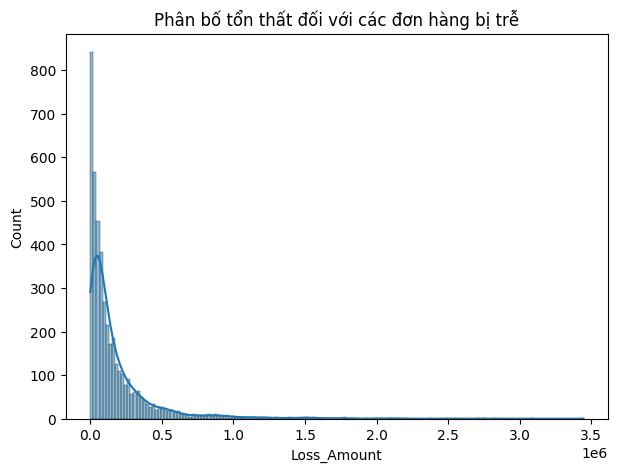

In [23]:
plt.figure(figsize=(7,5))
sns.histplot(
    data=df[df['Delay_Flag'] == 1],
    x='Loss_Amount',
    kde=True
)
plt.title("Phân bố tổn thất đối với các đơn hàng bị trễ")
plt.show()


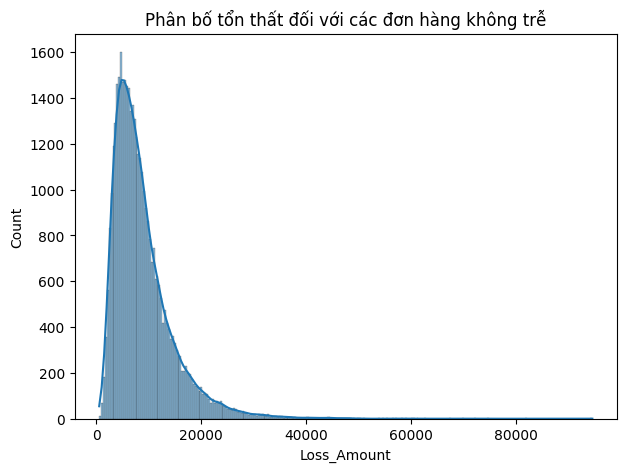

In [25]:
plt.figure(figsize=(7,5))
sns.histplot(
    data=df[df['Delay_Flag'] == 0],
    x='Loss_Amount',
    kde=True
)
plt.title("Phân bố tổn thất đối với các đơn hàng không trễ")
plt.show()


In [ ]:
# ======================================================
# 💾 LƯU DỮ LIỆU ĐÃ LÀM SẠCH
# ======================================================

output_path = "/Users/hoangvupham/Desktop/KLTN_VU/Data/final_cleaned_data.csv"
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print("✅ Dữ liệu đã được lưu thành công!")
print(f"📊 Số dòng: {df.shape[0]}, Số cột: {df.shape[1]}")
print(f"📁 File được lưu tại: {output_path}")


✅ Dữ liệu đã được lưu thành công!
📊 Số dòng: 43551, Số cột: 37
📁 File được lưu tại: /Users/hoangvupham/Desktop/KLTN_VU/Data/final_cleaned_data.csv
